<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_3_2)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.2_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,71.383553,74.726794,41.947907,0.000995,198.059249,198.058154,0.001095
1,0.0,1.0,21.579846,71.504521,94.147984,0.001467,197.233819,197.232386,0.001432
2,0.0,2.0,93.746936,71.228102,65.244713,-0.000437,240.219314,240.219532,-0.000218
3,0.0,3.0,54.772415,28.768500,37.397885,-0.008981,130.929819,130.939401,-0.009582
4,0.0,4.0,57.985735,84.346198,66.448213,0.000378,218.780524,218.779915,0.000609
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,52.065851,97.822000,54.142832,-0.000320,214.030362,214.030275,0.000087
249996,999.0,246.0,54.673940,35.513590,33.848179,0.001360,134.037068,134.036770,0.000298
249997,999.0,247.0,57.306068,31.720182,62.348468,0.004596,161.379315,161.375682,0.003633
249998,999.0,248.0,93.649454,45.275101,91.094798,0.002544,240.021897,240.019797,0.002100


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    71.383553  74.726794  41.947907  0.000995  198.059249   
      1.0    21.579846  71.504521  94.147984  0.001467  197.233819   
      2.0    93.746936  71.228102  65.244713 -0.000437  240.219314   
      3.0    54.772415  28.768500  37.397885 -0.008981  130.929819   
      4.0    57.985735  84.346198  66.448213  0.000378  218.780524   
...                ...        ...        ...       ...         ...   
999.0 245.0  52.065851  97.822000  54.142832 -0.000320  214.030362   
      246.0  54.673940  35.513590  33.848179  0.001360  134.037068   
      247.0  57.306068  31.720182  62.348468  0.004596  161.379315   
      248.0  93.649454  45.275101  91.094798  0.002544  240.021897   
      249.0  24.969187  96.114145  42.907750 -0.000990  173.990091   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    198.058154  0.001095  
      1.0    197.232386  0.001432  
      2.0    240.219532 -0.000218  
      3.0    130.939401 -0.009582  
      4.0    218.779915  0.000609  
...                 ...       ...  
999.0 245.0  214.030275  0.000087  
      246.0  134.036770  0.000298  
      247.0  161.375682  0.003633  
      248.0  240.019797  0.002100  
      249.0  173.990817 -0.000726  

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    71.383553  74.726794  41.947907  0.000995  198.059249   
      1.0    21.579846  71.504521  94.147984  0.001467  197.233819   
      2.0    93.746936  71.228102  65.244713 -0.000437  240.219314   
      3.0    54.772415  28.768500  37.397885 -0.008981  130.929819   
      4.0    57.985735  84.346198  66.448213  0.000378  218.780524   
...                ...        ...        ...       ...         ...   
999.0 245.0  52.065851  97.822000  54.142832 -0.000320  214.030362   
      246.0  54.673940  35.513590  33.848179  0.001360  134.037068   
      247.0  57.306068  31.720182  62.348468  0.004596  161.379315   
      248.0  93.649454  45.275101  91.094798  0.002544  240.021897   
      249.0  24.969187  96.114145  42.907750 -0.000990  173.990091   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    198.058154  0.001095  
      1.0    197.232386  0.001432  
      2.0    240.219532 -0.000218  
      3.0    130.939401 -0.009582  
      4.0    218.779915  0.000609  
...                 ...       ...  
999.0 245.0  214.030275  0.000087  
      246.0  134.036770  0.000298  
      247.0  161.375682  0.003633  
      248.0  240.019797  0.002100  
      249.0  173.990817 -0.000726  

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,71.383553,74.726794,41.947907,0.000995,198.059249,198.058154,0.001095
1,0.0,1.0,21.579846,71.504521,94.147984,0.001467,197.233819,197.232386,0.001432
2,0.0,2.0,93.746936,71.228102,65.244713,-0.000437,240.219314,240.219532,-0.000218
3,0.0,3.0,54.772415,28.768500,37.397885,-0.008981,130.929819,130.939401,-0.009582
4,0.0,4.0,57.985735,84.346198,66.448213,0.000378,218.780524,218.779915,0.000609
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,52.065851,97.822000,54.142832,-0.000320,214.030362,214.030275,0.000087
249996,999.0,246.0,54.673940,35.513590,33.848179,0.001360,134.037068,134.036770,0.000298
249997,999.0,247.0,57.306068,31.720182,62.348468,0.004596,161.379315,161.375682,0.003633
249998,999.0,248.0,93.649454,45.275101,91.094798,0.002544,240.021897,240.019797,0.002100


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    71.383553  74.726794  41.947907  0.000995  198.059249   
      1.0    21.579846  71.504521  94.147984  0.001467  197.233819   
      2.0    93.746936  71.228102  65.244713 -0.000437  240.219314   
      3.0    54.772415  28.768500  37.397885 -0.008981  130.929819   
      4.0    57.985735  84.346198  66.448213  0.000378  218.780524   
...                ...        ...        ...       ...         ...   
999.0 245.0  52.065851  97.822000  54.142832 -0.000320  214.030362   
      246.0  54.673940  35.513590  33.848179  0.001360  134.037068   
      247.0  57.306068  31.720182  62.348468  0.004596  161.379315   
      248.0  93.649454  45.275101  91.094798  0.002544  240.021897   
      249.0  24.969187  96.114145  42.907750 -0.000990  173.990091   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    198.058154  0.001095  
      1.0    197.232386  0.001432  
      2.0    240.219532 -0.000218  
      3.0    130.939401 -0.009582  
      4.0    218.779915  0.000609  
...                 ...       ...  
999.0 245.0  214.030275  0.000087  
      246.0  134.036770  0.000298  
      247.0  161.375682  0.003633  
      248.0  240.019797  0.002100  
      249.0  173.990817 -0.000726  

[250000 rows x 7 columns]

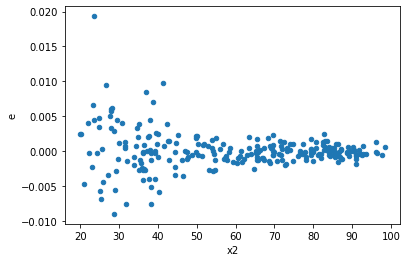

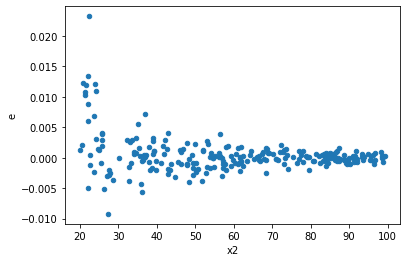

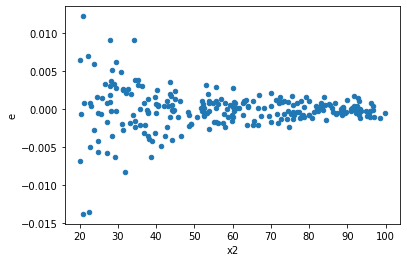

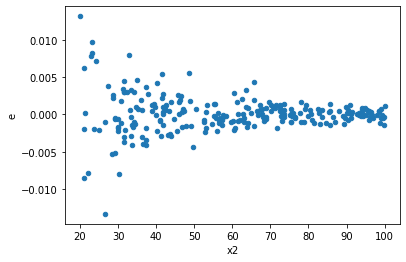

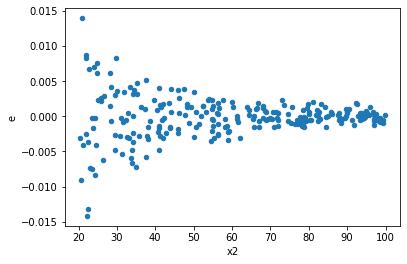

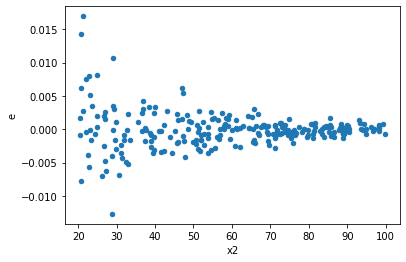

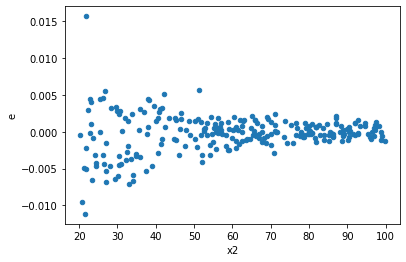

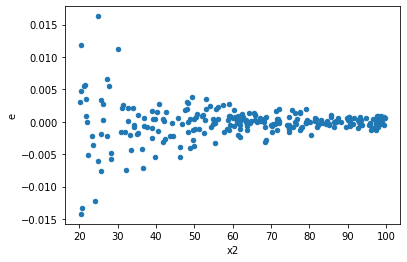

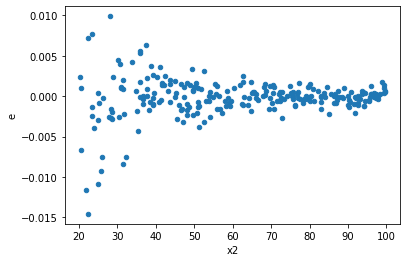

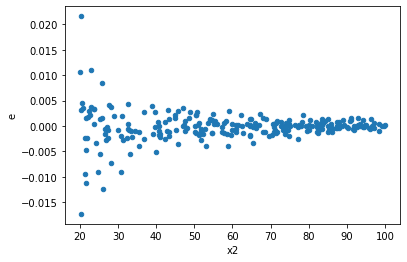

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
4.0,123.0,121.0,0.0004656008890554055,0.00176272971385363,3.7853730817512643e-06,1.4568014164079587e-05,3.848501547789272,8.071321389024888e-13,0.9999999999995964,4.035660694512444e-13,Reject005=0 : Heteroscedasticity
5.0,82.0,162.0,0.00018100057092700674,0.001748709162456969,2.207324035695204e-06,1.0794501002820797e-05,4.890310995694401,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
6.0,106.0,138.0,0.00029048731105192746,0.001355005056280648,2.740446330678561e-06,9.818877219424985e-06,3.582948189681838,3.795186387378635e-12,0.9999999999981024,1.8975931936893176e-12,Reject005=0 : Heteroscedasticity
8.0,139.0,105.0,0.0005604751219339475,0.0009567330874906862,4.0321951218269605e-06,9.111743690387487e-06,2.2597477093963194,1.6780855478293333e-05,0.9999916095722609,8.390427739146666e-06,Reject005=0 : Heteroscedasticity
9.0,126.0,118.0,0.0003802046384083248,0.0019290453444512645,3.0174971302248e-06,1.634784190212936e-05,5.417682667658896,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
10.0,131.0,113.0,0.0003464831412189584,0.0008344222981256754,2.6449094749538812e-06,7.384268125005978e-06,2.791879342159616,4.831144395645026e-08,0.999999975844278,2.415572197822513e-08,Reject005=0 : Heteroscedasticity
12.0,130.0,114.0,0.000460230749241746,0.0017009796849478988,3.5402365326288156e-06,1.4920874429367534e-05,4.214654668367027,6.52811138479592e-14,0.9999999999999674,3.26405569239796e-14,Reject005=0 : Heteroscedasticity
13.0,138.0,106.0,0.00032417049904057886,0.0012458807591256252,2.3490615872505716e-06,1.175359206722288e-05,5.00352657036111,4.440892098500626e-16,0.9999999999999998,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
17.0,105.0,139.0,0.0003123550814904005,0.0014217136030246892,2.974810299908576e-06,1.0228155417443808e-05,3.4382546738385797,1.670730220837413e-11,0.9999999999916463,8.353651104187065e-12,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,122.0,122.0,0.0014764001911917474,0.0002854330762365703,1.2101640911407765e-05,2.3396153789882813e-06,0.19333042486683052,7.063688742513873e-18,Reject005=0 : Heteroscedasticity
1.0,122.0,122.0,0.00170279544982504,0.0004940660176239397,1.3957339752664262e-05,4.049721455933932e-06,0.2901499517600334,3.6069838477749e-11,Reject005=0 : Heteroscedasticity
2.0,123.0,121.0,0.0013728051258389195,0.00032657575115913425,1.1161017283243249e-05,2.69897315007549e-06,0.24182142913868893,4.628860983854618e-14,Reject005=0 : Heteroscedasticity
3.0,112.0,132.0,0.0011744143795460317,0.00044884744716365636,1.048584267451814e-05,3.4003594482095178e-06,0.3242809904513254,2.7837056293486816e-09,Reject005=0 : Heteroscedasticity
4.0,123.0,121.0,0.0004656008890554055,0.00176272971385363,3.7853730817512643e-06,1.4568014164079587e-05,3.848501547789272,8.071321389024888e-13,Reject005=0 : Heteroscedasticity
5.0,82.0,162.0,0.00018100057092700674,0.001748709162456969,2.207324035695204e-06,1.0794501002820797e-05,4.890310995694401,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
6.0,106.0,138.0,0.00029048731105192746,0.001355005056280648,2.740446330678561e-06,9.818877219424985e-06,3.582948189681838,3.795186387378635e-12,Reject005=0 : Heteroscedasticity
7.0,112.0,132.0,0.0017073528251601749,0.0002833259359566933,1.5244221653215847e-05,2.1464086057325248e-06,0.14080145609006733,7.942024498976847e-23,Reject005=0 : Heteroscedasticity
8.0,139.0,105.0,0.0005604751219339475,0.0009567330874906862,4.0321951218269605e-06,9.111743690387487e-06,2.2597477093963194,1.6780855478293333e-05,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    978
Reject005=1 : Homoscedasticity       22
Name: Result_test, dtype: int64